In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn.feature_selection as fs
import sklearn.datasets as skdatasets

## __Feature Selection__

Feature selection is a process where you select those features in your data that contribute most to the prediction variable or output in which you are interested.

Three benefits of performing feature selection before modeling your data are:

* Reduces Overfitting
* Improves Accuracy
* Reduces Training Time

You should include the feature selection step __before__ feeding the data to the model for training especially when you are using accuracy estimation methods such as cross-validation. This ensures that feature selection is performed on the data fold right before the model is trained. If you perform feature selection first to prepare your data, then perform model selection and training on the selected features then it would be a blunder.

If you perform feature selection on all of the data and then cross-validate, then the test data in each fold of the cross-validation procedure was also used to choose the features, and this tends to bias the performance of your machine learning model.

In [16]:
boston_data = skdatasets.load_boston()

In [17]:
data = pd.DataFrame(boston_data['data'], columns=boston_data.feature_names)
data['MEDV'] = boston_data['target']
x = data.drop('MEDV', axis=1)
y = data['MEDV']

In [18]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


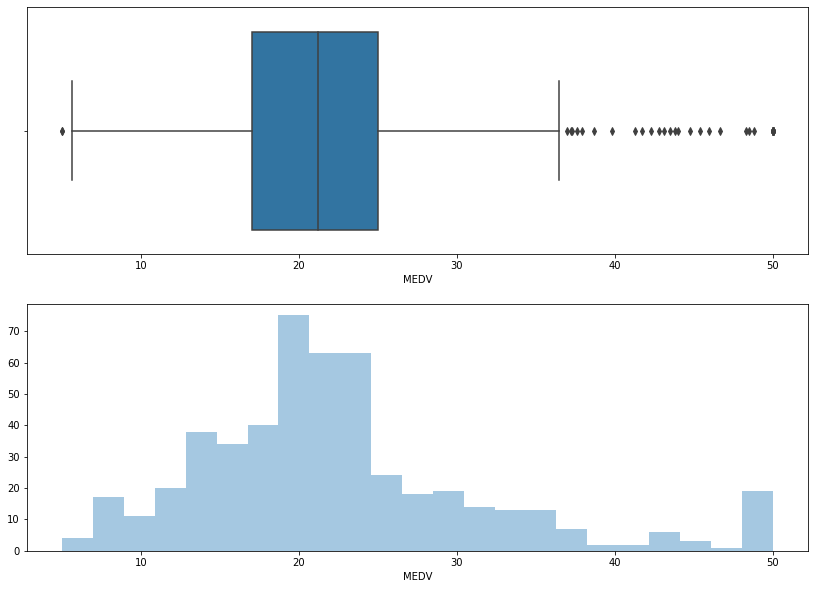

In [19]:
plt.figure(figsize=(14, 10))
plt.subplot(211)
sns.boxplot(y)
plt.subplot(212)
sns.distplot(y, kde=False)

### Filter methods

Filter methods are generally used as a data preprocessing step. The selection of features is independent of any machine learning algorithm. Features give rank on the basis of statistical scores which tend to determine the features' correlation with the outcome variable. Correlation is a heavily contextual term, and it varies from work to work. You can refer to the following table for defining correlation coefficients for different types of data (in this case continuous and categorical).

<img src=https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1537549804/Image1_c4jcxi.png></img>


* __Pearson’s Correlation__: It is used as a measure for quantifying linear dependence between two continuous variables X and Y. Its value varies from -1 to +1.
$$\rho=\frac{cov(x, y)}{\sigma_x\sigma_y}$$
* __Linear Discriminant Analysis (LDA)__: Linear discriminant analysis is used to find a linear combination of features that characterizes or separates two or more classes (or levels) of a categorical variable.
* __ANOVA (Analysis of Variance)__: It is similar to LDA except for the fact that it is operated using one or more categorical independent features and one continuous dependent feature. It provides a statistical test of whether the means of several groups are equal or not.
* ${\chi}^2$__(Chi-squared)__: It is a is a statistical test applied to the groups of categorical features to evaluate the likelihood of correlation or association between them using their frequency distribution.

__Important!__ Filter methods do not remove multicollinearity. So, you must deal with multicollinearity of features as well before training models for your data.

In [20]:
corr = data.corr()

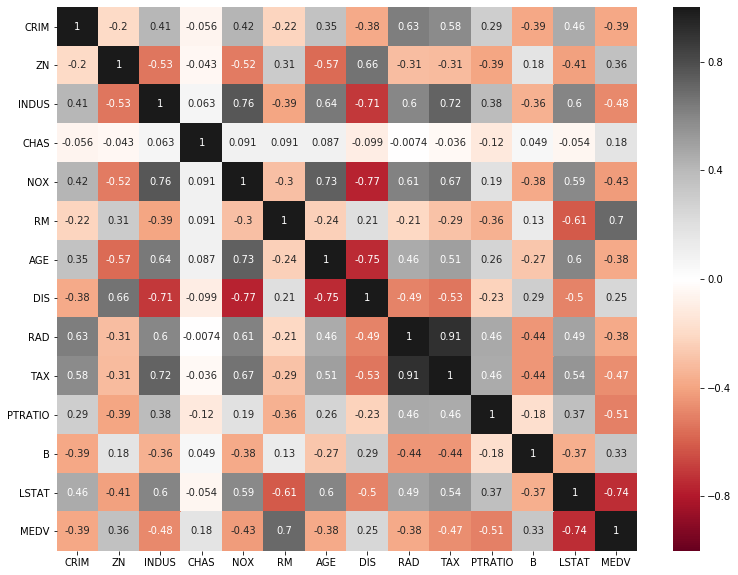

In [21]:
plt.figure(figsize=(13, 10))
sns.heatmap(corr, annot=True, cmap='RdGy', vmin=-1, vmax=1)

In [22]:
high_corr_features = corr[abs(corr['MEDV']) > 0.5].index.tolist()

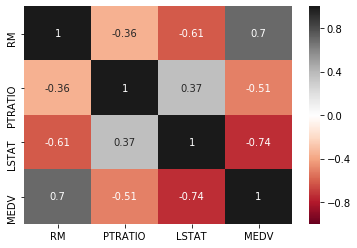

In [23]:
sns.heatmap(data[high_corr_features].corr(), cmap='RdGy', vmin=-1, vmax=1, annot=True)

### Wrapper methods

A wrapper method needs one machine learning algorithm and uses its performance as evaluation criteria. This method searches for a feature which is best-suited for the machine learning algorithm and aims to improve the mining performance.

<img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1537549832/Image2_ajaeo8.png"></img>

Some typical examples of wrapper methods are forward feature selection, backward feature elimination, recursive feature elimination, etc.

* __Forward Selection__: The procedure starts with an empty set of features [reduced set]. The best of the original features is determined and added to the reduced set. At each subsequent iteration, the best of the remaining original attributes is added to the set.

* __Backward Elimination__: The procedure starts with the full set of attributes. At each step, it removes the worst attribute remaining in the set.

* __Combination of forward selection and backward elimination__: The stepwise forward selection and backward elimination methods can be combined so that, at each step, the procedure selects the best attribute and removes the worst from among the remaining attributes.

* __Recursive Feature elimination__: Recursive feature elimination performs a greedy search to find the best performing feature subset. It iteratively creates models and determines the best or the worst performing feature at each iteration. It constructs the subsequent models with the left features until all the features are explored. It then ranks the features based on the order of their elimination. In the worst case, if a dataset contains N number of features RFE will do a greedy search for 2N combinations of features.


### Difference between filter and wrapper methods

* Filter methods do not incorporate a machine learning model in order to determine if a feature is good or bad whereas wrapper methods use a machine learning model and train it the feature to decide if it is essential or not.

* Filter methods are much faster compared to wrapper methods as they do not involve training the models. On the other hand, wrapper methods are computationally costly, and in the case of massive datasets, wrapper methods are not the most effective feature selection method to consider.

* Filter methods may fail to find the best subset of features in situations when there is not enough data to model the statistical correlation of the features, but wrapper methods can always provide the best subset of features because of their exhaustive nature.

* Using features from wrapper methods in your final machine learning model can lead to overfitting as wrapper methods already train machine learning models with the features and it affects the true power of learning. But the features from filter methods will not lead to overfitting in most of the cases

### Embedded methods

Embedded methods are iterative in a sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration. Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient threshold.

Examples of regularization algorithms are the __Lasso__, __Ridge__ regression.
* __Lasso__ regression performs L1 regularization which adds penalty equivalent to absolute value of the magnitude of coefficients.
$$Cost_{L1}(Q)=Cost(Q) + \frac{\alpha}{m}\sum_{i=1}^{m}abs(Q_i)$$
* __Rigde__ regression performs L2 regularization which adds penalty equivalent to square of the magnitude of coefficients.
$$Cost_{L2}(Q)=Cost(Q) + \frac{\alpha}{2m}\sum_{i=1}^{m}Q_i^2$$

$\alpha$ is the parameter which balances the amount of emphasis given to minimizing RSS vs. minimizing absolute/squared sum of coefficients.

In [15]:
from sklearn.linear_model import Lasso

In [24]:
lasso = Lasso()

In [25]:
lasso.fit(x, y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [27]:
lasso.coef_

array([-0.06343729,  0.04916467, -0.        ,  0.        , -0.        ,
        0.9498107 ,  0.02090951, -0.66879   ,  0.26420643, -0.01521159,
       -0.72296636,  0.00824703, -0.76111454])